# Car Price Prediction Model 

In [168]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
#IMPORTING DATASET
dataset = pd.read_csv('/home/bravin/Documents/Practice/Car-Price-Prediction-Challenge/car_price_prediction.csv',index_col=0)

#CHECKING DATASET
dataset.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [170]:
#CHECKING DATASET SHAPE
dataset.shape

(19237, 17)

In [171]:
#CHECKING DATASET INFO
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

# Data Cleaning 

In [172]:
# REMOVING KM FROM MILEAGE
dataset.Mileage = dataset.Mileage.str.replace('km','')

In [173]:
# CHANGING Prod Year to Date
dataset['Prod. year'] = pd.to_datetime(dataset['Prod. year'], format='%Y')

In [174]:
# Investgate Engine Volume 
dataset['Engine volume'].value_counts()

# REmove Turbo from Engine Volume
dataset['Engine volume'] = dataset['Engine volume'].str.replace('Turbo','')

# Convert Engine Volume to Float
dataset['Engine volume'] = dataset['Engine volume'].astype(float)

In [175]:
# Convert Mileage to Float
dataset['Mileage'] = dataset['Mileage'].astype(float)

In [176]:
# Replace '-' with NaN in Levy column
dataset['Levy'] = dataset['Levy'].replace('-', np.nan)

# Convert Levy to float
dataset['Levy'] = dataset['Levy'].astype(float)

# Fill NaN WITH 0
dataset['Levy'] = dataset['Levy'].fillna(0)


In [204]:
# Cleaning Door column from '04-May' to 4 and '02-Mar' to 2
dataset['Doors'] = dataset['Doors'].replace('04-May', 4).replace('02-Mar', 2).replace('>5', 5)


In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19234 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price             19234 non-null  int64         
 1   Levy              19234 non-null  float64       
 2   Manufacturer      19234 non-null  object        
 3   Model             19234 non-null  object        
 4   Prod. year        19234 non-null  datetime64[ns]
 5   Category          19234 non-null  object        
 6   Leather interior  19234 non-null  object        
 7   Fuel type         19234 non-null  object        
 8   Engine volume     19234 non-null  float64       
 9   Mileage           19234 non-null  float64       
 10  Cylinders         19234 non-null  float64       
 11  Gear box type     19234 non-null  object        
 12  Drive wheels      19234 non-null  object        
 13  Doors             19234 non-null  int64         
 14  Wheel       

In [206]:
# DESCRIBE DATASET
dataset.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags
count,19234.000000,19234.000000,19234.000000,1.923400e+04,19234.000000,19234.000000,19234.000000
mean,17113.065717,632.519861,2.307726,1.532469e+06,4.582666,3.925964,6.583030
std,18278.647663,567.635091,0.877305,4.840764e+07,1.199513,0.403191,4.319807
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5331.000000,0.000000,1.800000,7.015675e+04,4.000000,4.000000,4.000000
50%,13172.000000,642.000000,2.000000,1.260090e+05,4.000000,4.000000,6.000000
75%,22063.000000,917.000000,2.500000,1.889720e+05,4.000000,4.000000,12.000000
max,308906.000000,11714.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


# Data Visualization 

/home/bravin/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bravin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


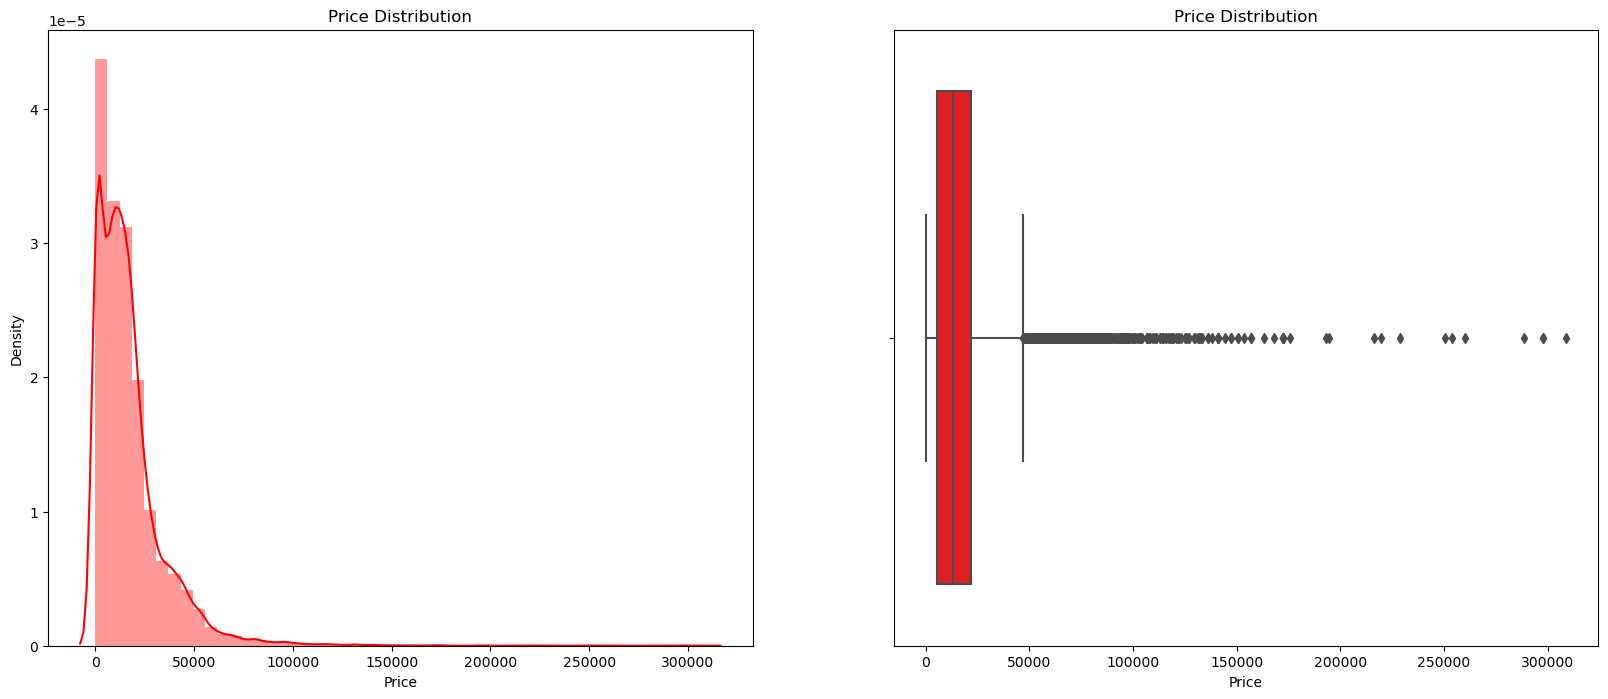

In [207]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.show()

In [180]:
# CHeck for outliers in Price
dataset[dataset['Price'] > 600000]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45795524,627220,0.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020-01-01,Jeep,Yes,Petrol,6.3,0.0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
45761204,872946,2067.0,LAMBORGHINI,Urus,2019-01-01,Universal,Yes,Petrol,4.0,2531.0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
45812886,26307500,0.0,OPEL,Combo,1999-01-01,Goods wagon,No,Diesel,1.7,99999.0,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


In [183]:
# Removing outlier in price ID 45812886
dataset = dataset.drop(dataset[dataset['Price'] > 600000].index, axis=0)

/home/bravin/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bravin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


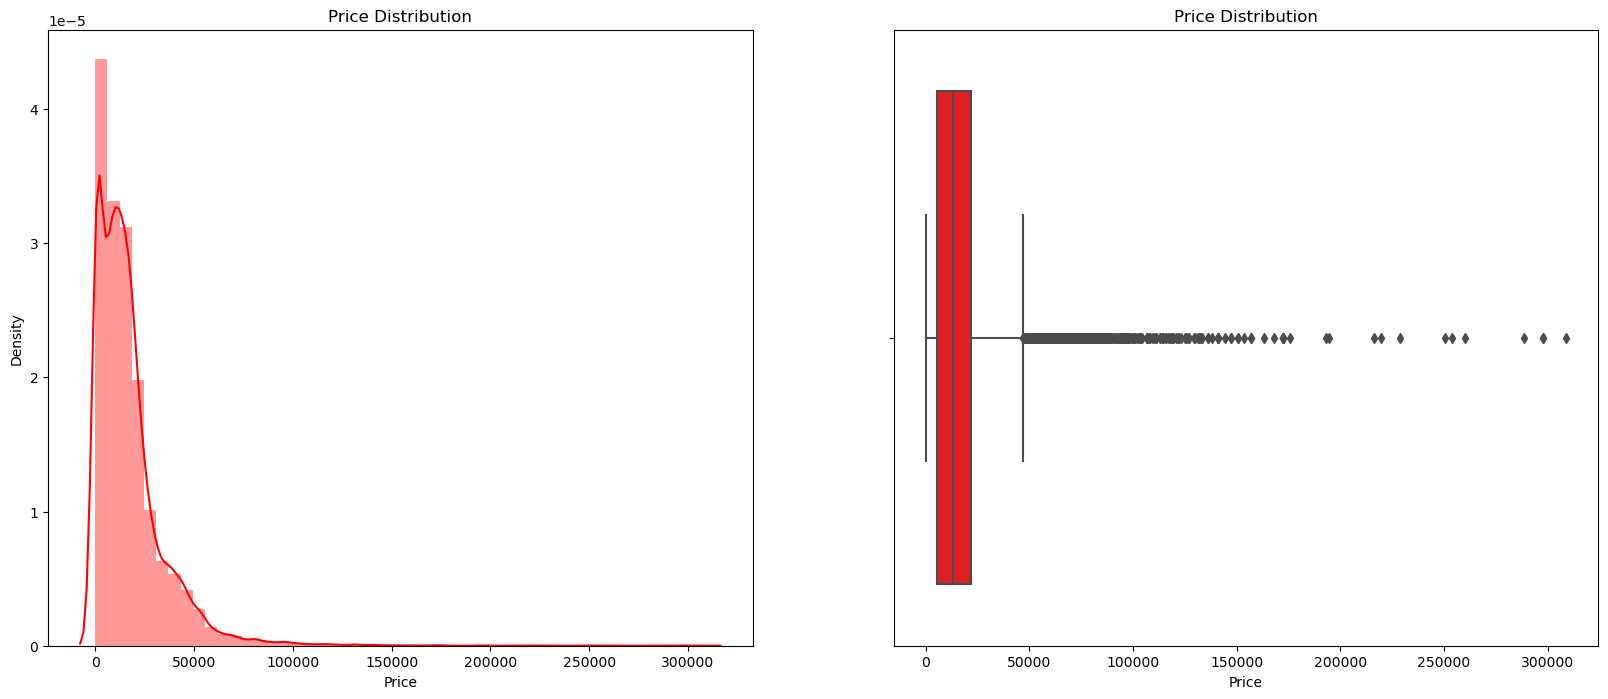

In [184]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(dataset['Price'], color='red')
plt.title('Price Distribution')

plt.show()

In [186]:
print(dataset.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     19234.000000
mean      17113.065717
std       18278.647663
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22063.000000
85%       30734.000000
90%       38574.000000
100%     308906.000000
max      308906.000000
Name: Price, dtype: float64


$Inference$
* The data is skwed to the right meaning most prices in the dataset are below ```$ 20,000```
* Their is a significant difference between the mean and the median.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(75% of the prices are below ```22,063```, whereas the remaining 15% are between ```30,734``` and ```308,906```.)

# Visualizing Categorical Variables 
* Manufacturer 
* Model 
* Category 
* Leather Interior 
* Fuel type 
* Gear box type 
* DRive wheels 
* Doors 
* Wheel 
* Color 

In [188]:
# Catetgorical/Object Features
cat_features = dataset.select_dtypes(include=['object']).columns
cat_features

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

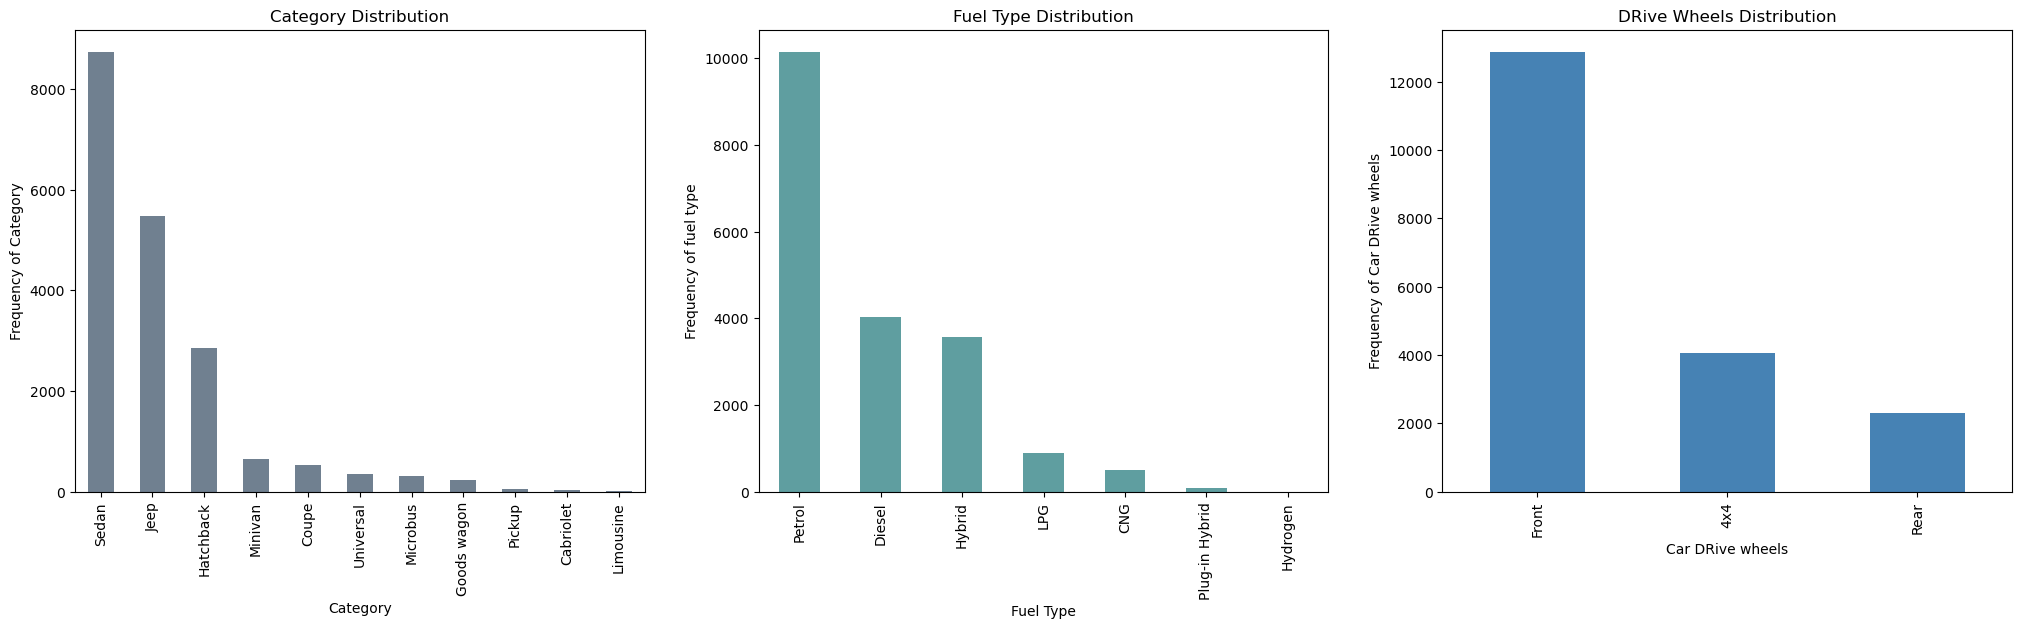

In [199]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = dataset.Category.value_counts().plot(kind='bar', color='slategrey')
plt.title('Category Distribution')
plt1.set(xlabel='Category', ylabel='Frequency of Category')

plt.subplot(1,3,2)
plt1 = dataset['Fuel type'].value_counts().plot(kind='bar', color='cadetblue')
plt.title('Fuel Type Distribution')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = dataset['Drive wheels'].value_counts().plot(kind='bar', color='steelblue')
plt.title('DRive Wheels Distribution')
plt1.set(xlabel = 'Car DRive wheels', ylabel='Frequency of Car DRive wheels')

plt.show()

/home/bravin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


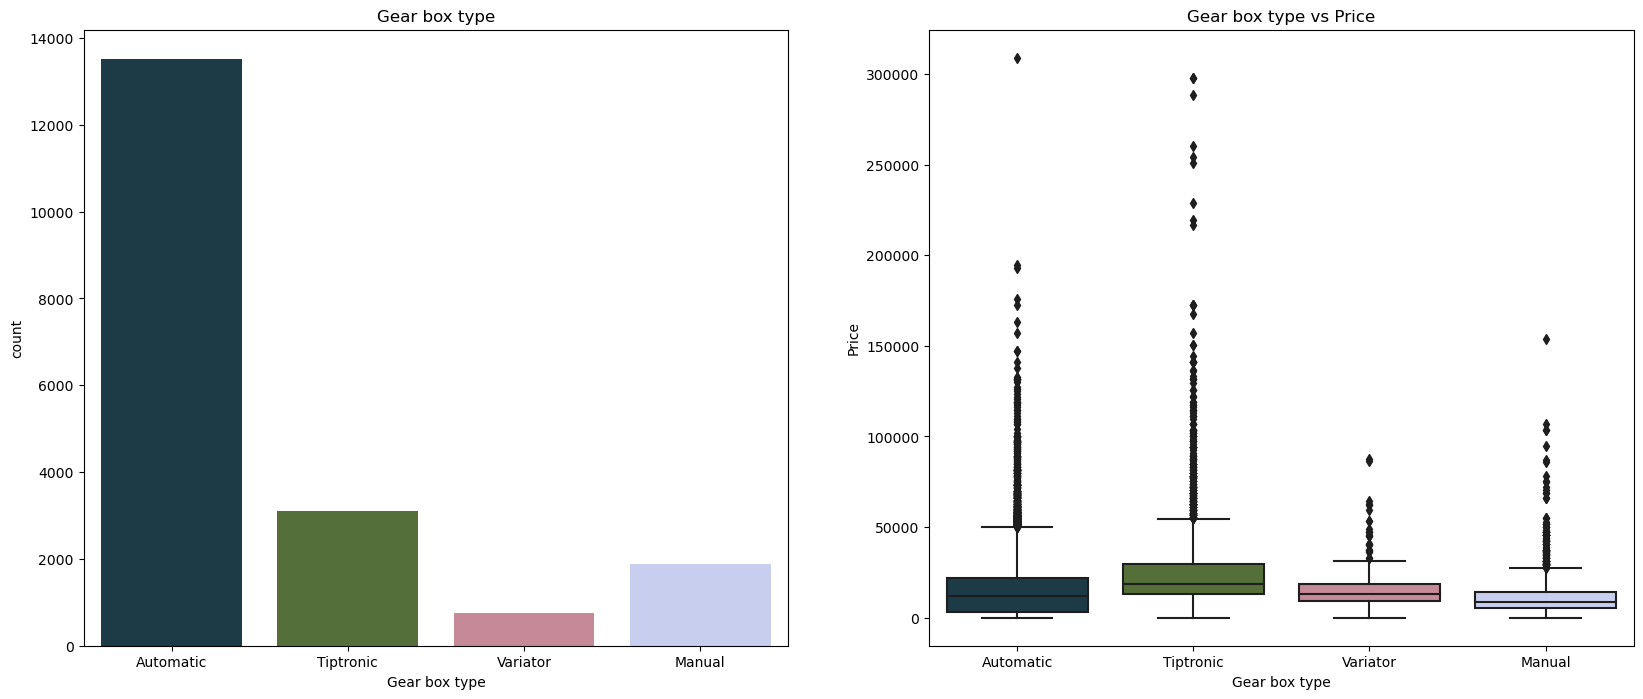

In [201]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Gear box type')
sns.countplot(dataset['Gear box type'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Gear box type vs Price')
sns.boxplot(x=dataset['Gear box type'], y=dataset.Price, palette=("cubehelix"))

plt.show()